<a href="https://colab.research.google.com/github/yacoan81/OCS_demo/blob/main/Lunch%26Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

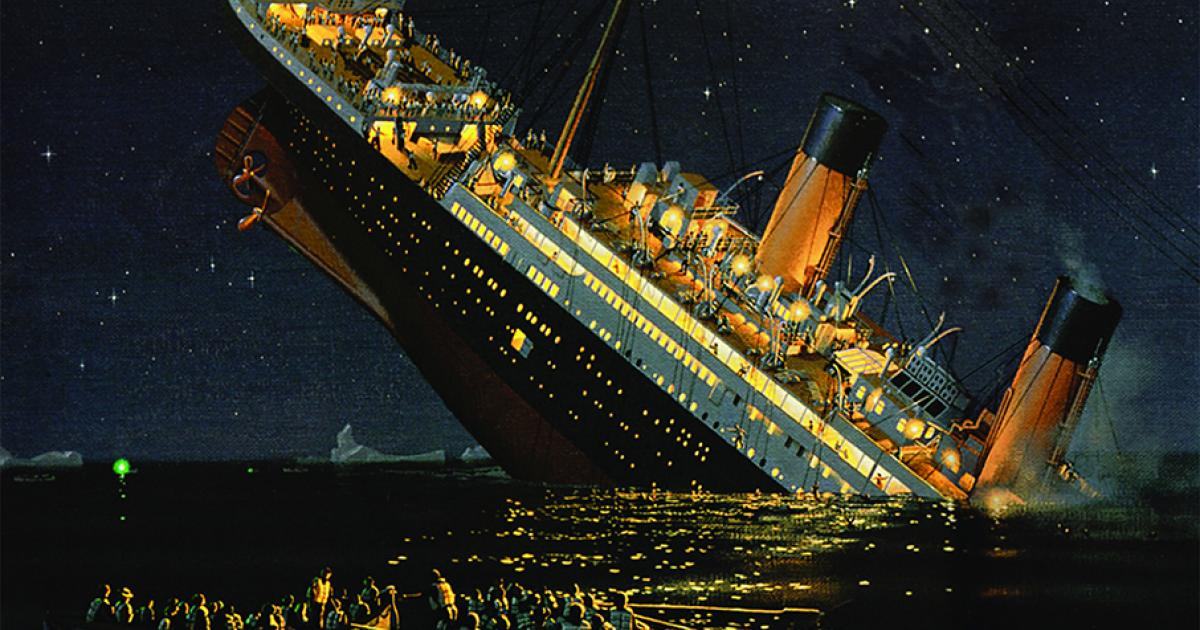

| Variable | Definition | Key |
| --- | --- | --- |
| survival | Survival | 0 = No, 1 = Yes |
| pclass | 	Ticket class | 	1 = 1st, 2 = 2nd, 3 = 3rd
| sex	|  Sex
| Age	|  Age in years
| sibsp | 	# of siblings / spouses aboard the Titanic
| parch | 	# of parents / children aboard the Titanic
| ticket	|  Ticket number
| fare | 	Passenger fare
| cabin	| Cabin number
| embarked	|  Port of Embarkation| 	C = Cherbourg, Q = Queenstown, S = Southampton

&nbsp;

**Variable Notes** \
pclass: A proxy for socio-economic status (SES) \
1st = Upper \
2nd = Middle   
3rd = Lower \
&nbsp;

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5 \
&nbsp;

**sibsp**: The dataset defines family relations in this way... \
Sibling = brother, sister, stepbrother, stepsister \
Spouse = husband, wife (mistresses and fiancés were ignored) \
&nbsp;

**parch**: The dataset defines family relations in this way... \
Parent = mother, father \
Child = daughter, son, stepdaughter, stepson \
Some children travelled only with a nanny, therefore parch=0 for them.

## Importing the Titanic Dataset

In [54]:
import pandas as pd # Pandas for data manipulation and analysis
import matplotlib.pyplot as plt # Interactive plots in a MATLAB-like way
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler
# Import the data
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"

# Load the Titanic dataset
titanic = pd.read_csv(url)

The variable '**titanic**' now holds a Pandas DataFrame. \
A DataFrame is a two-dimensional, tabular data structure with labeled axes (rows and columns).\
Essentially a table where each column can have a different data type (integer, float, string, etc.).\
... the same as a SAS table.


## Pandas basics

The '**titanic**' Pandas DataFrame is an object, and like any other objects in Python, it can have both methods and attributes.

To access methods and attributes in pandas DataFrame you can use the dot notation.

**Attributes**. Property or characteristic of the object. \
Example:
- titanic.columns
- titanic.shape
- titanic.index \

No Parentheses for Attributes

**Methods**. Functions that perform specific actions on the object's data. \
Example:
- titanic.head(5)
- titanic.describe()
- titanic.info() \

Uses parentheses (might require input arguments)

Objects in python are designed to be ***immutable***: the original data structure is not modified in place when you perform operations.

Accessing column(s) in a DataFrame
- Dot Notation -> 'df.Age' (columns are also considered attributes)
- Bracket Notation -> df['Age']

Bracket notation is preferred because columns names can have spaces.

Brackets are used to access and selection (row and columns):
- df['Age','Sex']
- Slicing: df[1:5]
- etc.


- titanic.groupby('Survived')['Age'].mean()

In [55]:
# titanic.groupby('Survived')
# titanic.groupby('Survived').mean()
# titanic.groupby('Survived')['Age'].mean()
# titanic.columns


In [56]:
titanic.drop('Survived',axis=1).head(5)

,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [57]:
titanic.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

## **Exploring Dataset**

In [58]:
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [59]:
titanic.head()   # Display the first few rows of the dataset

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [60]:
# Descriptive statistics of numerical columns
titanic.describe().T  # Transpose

,count,mean,std,min,25%,50%,75%,max
Survived,887.0,0.385569,0.487004,0.00,0.000,0.0000,1.0000,1.0000
Pclass,887.0,2.305524,0.836662,1.00,2.000,3.0000,3.0000,3.0000
Age,887.0,29.471443,14.121908,0.42,20.250,28.0000,38.0000,80.0000
Siblings/Spouses Aboard,887.0,0.525366,1.104669,0.00,0.000,0.0000,1.0000,8.0000
Parents/Children Aboard,887.0,0.383315,0.807466,0.00,0.000,0.0000,0.0000,6.0000
Fare,887.0,32.305420,49.782040,0.00,7.925,14.4542,31.1375,512.3292


Useful variables to predict survival:
- Sex
- Pclass
- Age (age categories)


In [61]:
# Checking for missing values
titanic.isna().sum().sort_values(ascending=False)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

Age column has 177 missing values (891-177=714). \
Cabin is just the cabin number, not really useful information.


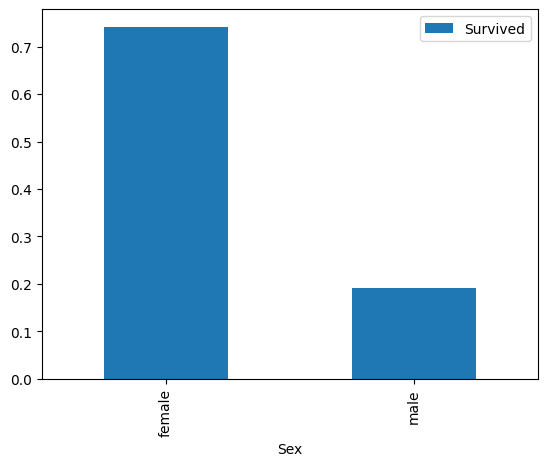

In [62]:
Sex_pivot = titanic.pivot_table(index="Sex", values="Survived")
Sex_pivot.plot.bar()
plt.show()

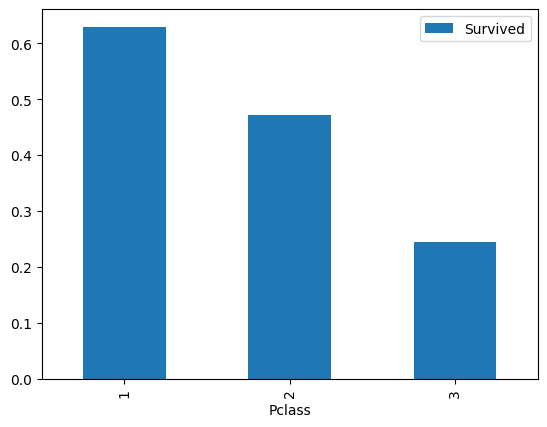

In [63]:
pclass_pivot = titanic.pivot_table(index="Pclass",values="Survived")
# pclass_pivot
pclass_pivot.plot.bar()
plt.show()

**Handling Categorical Features** \

PCLASS is an ordered categorical variable, or just an "ordinal variable".\
SEX is not, we need to get dummy variables for Sex. \
It's called One-hot Encoding (or Dummy Encoding)

In [64]:
features = ['Pclass','Sex','Age']
X = pd.get_dummies(titanic[features])


In [65]:
X.head(10)

,Pclass,Age,Sex_female,Sex_male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
5,3,27.0,0,1
6,1,54.0,0,1
7,3,2.0,0,1
8,3,27.0,1,0
9,2,14.0,1,0


In [66]:
# for more categories:
pd.get_dummies(X['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
882,0,1,0
883,1,0,0
884,0,0,1
885,1,0,0


# Build Models

In [67]:
x = titanic[features]
y = titanic['Survived']

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [69]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((709, 3), (178, 3), (709,), (178,))

In [70]:
x_train.shape[0] / titanic.shape[0] , x_test.shape[0] / titanic.shape[0]

(0.7993235625704622, 0.20067643742953778)

**Logistic Regression With GridSearchCV**

In [71]:
lr = LogisticRegression(random_state=42)
param_grid_lr = {
    'C' : [100,10,1.0,0.1,0.01],
    'penalty':['l1','l2']
}

lr_grid_model = GridSearchCV(lr,param_grid=param_grid_lr , scoring='accuracy' , cv= 5)
lr_grid_model.fit(x_train,y_train)
print("Best Parameters: ", lr_grid_model.best_params_)
Best_Logistic_Regression_Model = lr_grid_model.best_estimator_

ValueError: 
All the 50 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'female'

--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1196, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 584, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1106, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 879, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_array_api.py", line 185, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'male'


In [ ]:
https://www.kaggle.com/competitions/titanic/code?competitionId=3136&sortBy=voteCount&excludeNonAccessedDatasources=true
https://www.kaggle.com/code/alexisbcook/titanic-tutorial
https://www.kaggle.com/code/mohamedzaghloula/titanic-classification-survived-or-not
https://www.kaggle.com/code/saisivasriram/titanic-feature-understanding-from-plots/notebook
https://www.kaggle.com/code/sashr07/kaggle-titanic-tutorial

In [80]:
a = 2
b = 3
a + b

5

\# Text Cell
